In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras import optimizers
import keras
from keras.utils.np_utils import to_categorical


# define the CNN Architecture
def net():
    lenet = Sequential()
    lenet.add(Conv2D(filters=6, kernel_size=(5, 5), strides=1, padding='valid', activation='relu', input_shape=(32, 32, 3)))
    lenet.add(MaxPool2D(pool_size=2, strides=2))
    lenet.add(Conv2D(filters=16, kernel_size=(5, 5), strides=1, padding='valid', activation='relu'))
    lenet.add(MaxPool2D(pool_size=2, strides=2))
    lenet.add(Flatten())
    lenet.add(Dense(120, activation='relu'))
    lenet.add(Dense(84, activation='relu'))
    lenet.add(Dense(10, activation='softmax'))
    #show the architecture
    lenet.summary()
    return lenet

def plotHistory(train, test):
    f, ax = plt.subplots()
    ax.plot(train)
    ax.plot(test)
    ax.legend(['Train','Test'], loc='lower right')
    ax.set_title('Training/Test Accuracy per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')

Using TensorFlow backend.


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
____________________________________________________________

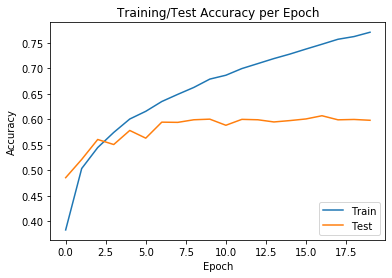

In [2]:
# import CIFAR-10 dataset
# Original parameter set
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)
lenet = net()

# Normalize
train_data = train_data/255
test_data = test_data/255
# One hot
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

sgd = optimizers.SGD(lr=0.01, decay=0.0001, momentum=0.85, nesterov=True)

lenet.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
training_history = lenet.fit(train_data, train_label, batch_size=20, epochs=20, 
                             validation_data=(test_data, test_label))

score = lenet.evaluate(test_data, test_label)
print(score)
plotHistory(training_history.history['accuracy'], training_history.history['val_accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

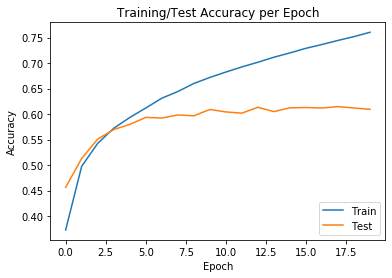

In [4]:
# parameter set #2
# batch sizes: 20->50
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras import optimizers
import keras
from keras.utils.np_utils import to_categorical

(train_data, train_label), (test_data, test_label) = cifar10.load_data()

train_data = train_data/255
test_data = test_data/255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

lenet = net()

sgd = optimizers.SGD(lr=0.01, decay=0.0001, momentum=0.85, nesterov=True)
lenet.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
training_history = lenet.fit(train_data, train_label, batch_size=50, epochs=20,
                             validation_data=(test_data, test_label))
score = lenet.evaluate(test_data, test_label)
print(score)
plotHistory(training_history.history['accuracy'], training_history.history['val_accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

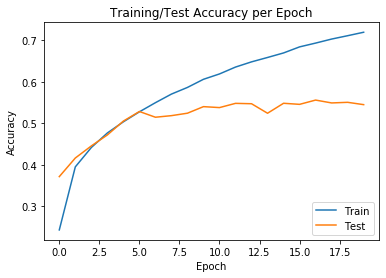

In [5]:
# parameter set #3
# learning rate: 0.01 -> 0.04
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras import optimizers
import keras
from keras.utils.np_utils import to_categorical

(train_data, train_label), (test_data, test_label) = cifar10.load_data()

train_data = train_data/255
test_data = test_data/255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

lenet = net()

sgd = optimizers.SGD(lr=0.04, decay=0.0001, momentum=0.85, nesterov=True)
lenet.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
training_history = lenet.fit(train_data, train_label, batch_size=20, epochs=20,
                             validation_data=(test_data, test_label))
score = lenet.evaluate(test_data, test_label)
print(score)
plotHistory(training_history.history['accuracy'], training_history.history['val_accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_17 (Dense)             (None, 84)               

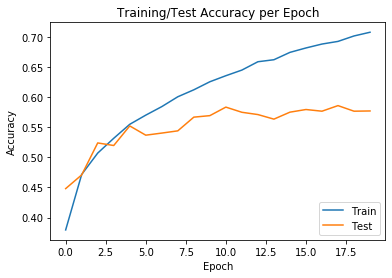

In [7]:
# parameter set #4
# decay: 0.0001 -> 0.00001
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras import optimizers
import keras
from keras.utils.np_utils import to_categorical

(train_data, train_label), (test_data, test_label) = cifar10.load_data()

train_data = train_data/255
test_data = test_data/255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

lenet = net()

sgd = optimizers.SGD(lr=0.01, decay=0.00001, momentum=0.85, nesterov=True)
lenet.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
training_history = lenet.fit(train_data, train_label, batch_size=20, epochs=20,
                             validation_data=(test_data, test_label))
score = lenet.evaluate(test_data, test_label)
print(score)
plotHistory(training_history.history['accuracy'], training_history.history['val_accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_20 (Dense)             (None, 84)               

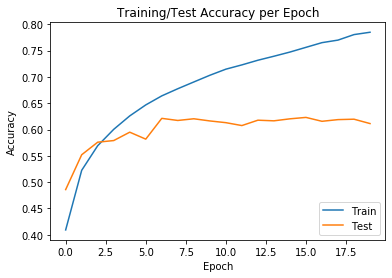

In [8]:
# parameter set #5
# optimizer: SGD -> Adadelta
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras import optimizers
import keras
from keras.utils.np_utils import to_categorical

(train_data, train_label), (test_data, test_label) = cifar10.load_data()

train_data = train_data/255
test_data = test_data/255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

lenet = net()

lenet.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
training_history = lenet.fit(train_data, train_label, batch_size=20, epochs=20,
                             validation_data=(test_data, test_label))
score = lenet.evaluate(test_data, test_label)
print(score)
plotHistory(training_history.history['accuracy'], training_history.history['val_accuracy'])